In this notebook, we will explore Lasso Regression Machine Learning model for the external Ligand set in methanol dataset.

# Machine Learning for Nickel Catalyzed Borylation in MeOH

In [1]:
import numpy as np
import pandas as pd
import sklearn

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math as math
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso

### Load Preprocessed Methanol Dataset 

In [2]:
dataset = pd.read_csv("./data/data_MeOH_Final.csv")
dataset.head()

,ArylHalide_CX_Lowdin,ArylHalide_C_Chem Shift,ArylHalide_C_Electrostatic,ArylHalide_C_Exposed Area,ArylHalide_C_Mulliken,ArylHalide_XY_Chem Shift_Max,ArylHalide_XY_Chem Shift_Min,ArylHalide_XY_Electrostatic_Max,ArylHalide_XY_Electrostatic_Min,ArylHalide_XY_Exposed Area_Avg,...,Kraken_vbur_vbur_max,Kraken_vbur_vbur_min,Kraken_vbur_vtot_boltz,Kraken_vmin_r_boltz,Kraken_vmin_vmin_boltz,Ligand,Ligand_inchi,Product_inchi,Solvent_inchi,Yield
0,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,50.731606,50.731606,351.19888,1.840787,-0.055960,A-paPhos,InChI=1S/C20H20NP/c1-21(2)17-13-15-20(16-14-17...,InChI=1S/C8H8BNO2/c11-9(12)7-1-2-8-6(5-7)3-4-1...,"InChI=1S/CH4O/c1-2/h2H,1H3",88.86
1,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,80.673770,61.935337,479.46484,1.803143,-0.058457,CX-FBu,InChI=1S/C29H39P.BF4/c1-2-3-22-29(27-20-12-10-...,InChI=1S/C8H8BNO2/c11-9(12)7-1-2-8-6(5-7)3-4-1...,"InChI=1S/CH4O/c1-2/h2H,1H3",54.07
2,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,107.755370,56.694310,386.44120,1.805810,-0.058387,CX-PCy,InChI=1S/C22H30NP/c1-4-11-19(12-5-1)23-18-10-1...,InChI=1S/C8H8BNO2/c11-9(12)7-1-2-8-6(5-7)3-4-1...,"InChI=1S/CH4O/c1-2/h2H,1H3",74.99
3,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,117.597336,54.091050,618.03375,1.817123,-0.054418,Cy-BippyPhos,InChI=1S/C36H39N4P/c1-6-16-28(17-7-1)34-36(35(...,InChI=1S/C8H8BNO2/c11-9(12)7-1-2-8-6(5-7)3-4-1...,"InChI=1S/CH4O/c1-2/h2H,1H3",82.92
4,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,111.484024,57.033180,402.37967,1.816461,-0.061351,Cy-JohnPhos,InChI=1S/C24H31P/c1-4-12-20(13-5-1)23-18-10-11...,InChI=1S/C8H8BNO2/c11-9(12)7-1-2-8-6(5-7)3-4-1...,"InChI=1S/CH4O/c1-2/h2H,1H3",80.25


In [3]:
dataset.Ligand.unique().tolist()

['A-paPhos',
 'CX-FBu',
 'CX-PCy',
 'Cy-BippyPhos',
 'Cy-JohnPhos',
 'Cy-PhenCar-Phos',
 'Cy-vBRIDP',
 'Kwong',
 'MePhos',
 'PCy3 HBF4',
 'Ph-DavePhos',
 'Ph-SPhos',
 'Ph-XPhos',
 'PMe3 HBF4',
 'PnBu3 HBF4',
 'P(o-Anis)3',
 'P(p-Anis)3',
 'P(p-F-Ph)3',
 'PPh2Cy',
 'PPh3',
 'PPhtBu2',
 'PXy3',
 'VPhos']

In [4]:
#load external ligand dataset in EtOH
ex_dataset = pd.read_csv("./data/external_ligand_data_MeOH.csv")
ex_dataset.head()

,ArylHalide_CX_Lowdin,ArylHalide_C_Chem Shift,ArylHalide_C_Electrostatic,ArylHalide_C_Exposed Area,ArylHalide_C_Mulliken,ArylHalide_XY_Chem Shift_Max,ArylHalide_XY_Chem Shift_Min,ArylHalide_XY_Electrostatic_Max,ArylHalide_XY_Electrostatic_Min,ArylHalide_XY_Exposed Area_Avg,...,Kraken_vbur_vbur_max,Kraken_vbur_vbur_min,Kraken_vbur_vtot_boltz,Kraken_vmin_r_boltz,Kraken_vmin_vmin_boltz,Ligand,Ligand_inchi,Product_inchi,Solvent_inchi,Yield
0,1.09,129.449,0.124,7.356,0.004,120.935,118.065,-0.177,-0.341,13.589,...,117.552360,56.790530,430.68256,1.797235,-0.062511,Cy-JohnPhos-OMe,InChI=1S/C25H33OP/c1-26-24-18-10-8-16-22(24)23...,InChI=1S/C8H7BO3/c10-9(11)7-1-2-8-6(5-7)3-4-12...,"InChI=1S/CH4O/c1-2/h2H,1H3",72.51
1,1.09,129.449,0.124,7.356,0.004,120.935,118.065,-0.177,-0.341,13.589,...,124.748184,58.538240,497.10650,1.784157,-0.063670,CPhos,InChI=1S/C28H41N2P/c1-29(2)25-19-13-20-26(30(3...,InChI=1S/C8H7BO3/c10-9(11)7-1-2-8-6(5-7)3-4-12...,"InChI=1S/CH4O/c1-2/h2H,1H3",59.62
2,1.09,129.449,0.124,7.356,0.004,120.935,118.065,-0.177,-0.341,13.589,...,109.966415,55.457000,415.06253,1.801754,-0.061979,CX-POMeCy,InChI=1S/C23H32NOP/c1-25-22-16-9-8-15-21(22)24...,InChI=1S/C8H7BO3/c10-9(11)7-1-2-8-6(5-7)3-4-12...,"InChI=1S/CH4O/c1-2/h2H,1H3",85.04
3,1.09,129.449,0.124,7.356,0.004,120.935,118.065,-0.177,-0.341,13.589,...,49.582157,43.828636,151.64550,1.826696,-0.062157,PEt3,"InChI=1S/C6H15P/c1-4-7(5-2)6-3/h4-6H2,1-3H3",InChI=1S/C8H7BO3/c10-9(11)7-1-2-8-6(5-7)3-4-12...,"InChI=1S/CH4O/c1-2/h2H,1H3",55.37
4,1.09,129.449,0.124,7.356,0.004,120.935,118.065,-0.177,-0.341,13.589,...,54.862930,51.901974,330.64270,1.833448,-0.054343,PPh2(o-Anis),InChI=1S/C19H17OP/c1-20-18-14-8-9-15-19(18)21(...,InChI=1S/C8H7BO3/c10-9(11)7-1-2-8-6(5-7)3-4-12...,"InChI=1S/CH4O/c1-2/h2H,1H3",74.73


In [5]:
ex_dataset.Ligand.unique().tolist()

['Cy-JohnPhos-OMe',
 'CPhos',
 'CX-POMeCy',
 'PEt3',
 'PPh2(o-Anis)',
 'RuPhos',
 'P(p-CF3-Ph)3',
 'CM-Phos',
 'PBn3',
 'CX-PInCy',
 'S-Phos',
 'PPhCy2']

In [6]:
#Training set
ML_data_traintest = dataset
ML_data_traintest2 = ML_data_traintest.drop(['Electrophile_inchi', 'Solvent_inchi', 'Ligand_inchi', 'Product_inchi', 'Electrophile', 'Ligand'], axis = 1)
print (ML_data_traintest2.shape)
ML_data_traintest2.head()

(779, 157)


,ArylHalide_CX_Lowdin,ArylHalide_C_Chem Shift,ArylHalide_C_Electrostatic,ArylHalide_C_Exposed Area,ArylHalide_C_Mulliken,ArylHalide_XY_Chem Shift_Max,ArylHalide_XY_Chem Shift_Min,ArylHalide_XY_Electrostatic_Max,ArylHalide_XY_Electrostatic_Min,ArylHalide_XY_Exposed Area_Avg,...,Kraken_vbur_qvtot_min_min,Kraken_vbur_qvtot_min_vburminconf,Kraken_vbur_ratio_vbur_vtot_boltz,Kraken_vbur_vbur_boltz,Kraken_vbur_vbur_max,Kraken_vbur_vbur_min,Kraken_vbur_vtot_boltz,Kraken_vmin_r_boltz,Kraken_vmin_vmin_boltz,Yield
0,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,59.829678,59.829678,0.144453,50.731606,50.731606,50.731606,351.19888,1.840787,-0.055960,88.86
1,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,47.895260,67.167030,0.134809,64.636100,80.673770,61.935337,479.46484,1.803143,-0.058457,54.07
2,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,36.894516,75.417816,0.211005,81.541550,107.755370,56.694310,386.44120,1.805810,-0.058387,74.99
3,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,45.164505,77.044235,0.160584,99.246600,117.597336,54.091050,618.03375,1.817123,-0.054418,82.92
4,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,44.561430,72.197180,0.212085,85.339290,111.484024,57.033180,402.37967,1.816461,-0.061351,80.25


In [7]:
X_train=ML_data_traintest2.drop(columns=['Yield'])
Y_train=ML_data_traintest2['Yield']

### Lasso

In [8]:
%%time
steps = [('scaler', StandardScaler()), ('model', Lasso())]
pipeline = Pipeline(steps)
parameters = {'model__alpha': np.logspace(-10, 1, 50)}

lasso_search = GridSearchCV(pipeline, 
                         parameters, 
                         cv = 5, 
                         scoring="neg_mean_squared_error", 
                         verbose=3)

lasso_search.fit(X_train, Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END .............................model__alpha=1e-10; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83284.89886082608, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94929.96107769822, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............................model__alpha=1e-10; total time=   0.2s
[CV 3/5] END .............................model__alpha=1e-10; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93276.41055841146, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89817.74671144858, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END .............................model__alpha=1e-10; total time=   0.2s
[CV 5/5] END .............................model__alpha=1e-10; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87835.78608540371, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83284.8984813254, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=1.67683293681101e-10; total time=   0.1s
[CV 2/5] END ..............model__alpha=1.67683293681101e-10; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94929.96067085683, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93276.41016440614, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=1.67683293681101e-10; total time=   0.2s
[CV 4/5] END ..............model__alpha=1.67683293681101e-10; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89817.7461724694, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87835.78450839146, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ..............model__alpha=1.67683293681101e-10; total time=   0.2s
[CV 1/5] END .............model__alpha=2.811768697974225e-10; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83284.89784496586, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94929.95998865146, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=2.811768697974225e-10; total time=   0.1s
[CV 3/5] END .............model__alpha=2.811768697974225e-10; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93276.40950372435, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89817.74526869075, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END .............model__alpha=2.811768697974225e-10; total time=   0.1s
[CV 5/5] END .............model__alpha=2.811768697974225e-10; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87835.78186400421, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83284.89677789739, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=4.71486636345739e-10; total time=   0.1s
[CV 2/5] END ..............model__alpha=4.71486636345739e-10; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94929.95884470662, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93276.40839587142, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=4.71486636345739e-10; total time=   0.1s
[CV 4/5] END ..............model__alpha=4.71486636345739e-10; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89817.74375320529, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87835.77742980936, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ..............model__alpha=4.71486636345739e-10; total time=   0.2s
[CV 1/5] END .............model__alpha=7.906043210907701e-10; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83284.89498860127, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94929.95692650284, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=7.906043210907701e-10; total time=   0.2s
[CV 3/5] END .............model__alpha=7.906043210907701e-10; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93276.40653818785, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89817.74121198907, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END .............model__alpha=7.906043210907701e-10; total time=   0.2s
[CV 5/5] END .............model__alpha=7.906043210907701e-10; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87835.76999440604, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83284.89198825126, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ............model__alpha=1.3257113655901108e-09; total time=   0.2s
[CV 2/5] END ............model__alpha=1.3257113655901108e-09; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94929.95370999572, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93276.40342316116, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ............model__alpha=1.3257113655901108e-09; total time=   0.1s
[CV 4/5] END ............model__alpha=1.3257113655901108e-09; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89817.73695079387, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87835.7575264788, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ............model__alpha=1.3257113655901108e-09; total time=   0.1s
[CV 1/5] END .............model__alpha=2.222996482526191e-09; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83284.88695716514, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94929.94831645023, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=2.222996482526191e-09; total time=   0.1s
[CV 3/5] END .............model__alpha=2.222996482526191e-09; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93276.39819978303, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89817.72980548108, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END .............model__alpha=2.222996482526191e-09; total time=   0.2s
[CV 5/5] END .............model__alpha=2.222996482526191e-09; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87835.73661985424, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83284.87852087451, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END .............model__alpha=3.727593720314938e-09; total time=   0.1s
[CV 2/5] END .............model__alpha=3.727593720314938e-09; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94929.93927237576, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93276.3894410496, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END .............model__alpha=3.727593720314938e-09; total time=   0.1s
[CV 4/5] END .............model__alpha=3.727593720314938e-09; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89817.71782398439, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87835.70156295432, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END .............model__alpha=3.727593720314938e-09; total time=   0.2s
[CV 1/5] END .............model__alpha=6.250551925273976e-09; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83284.86437462471, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94929.92410697449, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=6.250551925273976e-09; total time=   0.1s
[CV 3/5] END .............model__alpha=6.250551925273976e-09; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93276.37475411667, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89817.69773301462, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END .............model__alpha=6.250551925273976e-09; total time=   0.1s
[CV 5/5] END .............model__alpha=6.250551925273976e-09; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87835.64277843789, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83284.84065372766, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ............model__alpha=1.0481131341546852e-08; total time=   0.2s
[CV 2/5] END ............model__alpha=1.0481131341546852e-08; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94929.89867713259, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93276.35012657943, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ............model__alpha=1.0481131341546852e-08; total time=   0.2s
[CV 4/5] END ............model__alpha=1.0481131341546852e-08; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89817.66404380849, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87835.5442067589, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ............model__alpha=1.0481131341546852e-08; total time=   0.2s
[CV 1/5] END ............model__alpha=1.7575106248547893e-08; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83284.80087774614, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94929.85603554237, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END ............model__alpha=1.7575106248547893e-08; total time=   0.1s
[CV 3/5] END ............model__alpha=1.7575106248547893e-08; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93276.3088303047, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89817.60755262244, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ............model__alpha=1.7575106248547893e-08; total time=   0.1s
[CV 5/5] END ............model__alpha=1.7575106248547893e-08; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87835.37891889868, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83284.73418007414, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ............model__alpha=2.9470517025518096e-08; total time=   0.1s
[CV 2/5] END ............model__alpha=2.9470517025518096e-08; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94929.78453273543, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93276.23958332463, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ............model__alpha=2.9470517025518096e-08; total time=   0.2s
[CV 4/5] END ............model__alpha=2.9470517025518096e-08; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89817.51282629369, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87835.1017598323, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ............model__alpha=2.9470517025518096e-08; total time=   0.2s
[CV 1/5] END ............model__alpha=4.9417133613238385e-08; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83284.62233922914, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94929.66463452, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END ............model__alpha=4.9417133613238385e-08; total time=   0.2s
[CV 3/5] END ............model__alpha=4.9417133613238385e-08; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93276.12346763337, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89817.35398593756, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ............model__alpha=4.9417133613238385e-08; total time=   0.1s
[CV 5/5] END ............model__alpha=4.9417133613238385e-08; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87834.63701336809, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83284.43480083946, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END .............model__alpha=8.286427728546843e-08; total time=   0.1s
[CV 2/5] END .............model__alpha=8.286427728546843e-08; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94929.46358537293, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93275.92876081007, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END .............model__alpha=8.286427728546843e-08; total time=   0.2s
[CV 4/5] END .............model__alpha=8.286427728546843e-08; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89817.08763683261, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87833.85771958668, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END .............model__alpha=8.286427728546843e-08; total time=   0.2s
[CV 1/5] END .............model__alpha=1.389495494373136e-07; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83284.12033035558, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94929.12645990764, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=1.389495494373136e-07; total time=   0.1s
[CV 3/5] END .............model__alpha=1.389495494373136e-07; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93275.60226941068, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89816.64101285863, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END .............model__alpha=1.389495494373136e-07; total time=   0.1s
[CV 5/5] END .............model__alpha=1.389495494373136e-07; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87832.55099771461, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83283.59301607285, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END .............model__alpha=2.329951810515372e-07; total time=   0.1s
[CV 2/5] END .............model__alpha=2.329951810515372e-07; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94928.56115785139, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93275.0547962321, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END .............model__alpha=2.329951810515372e-07; total time=   0.1s
[CV 4/5] END .............model__alpha=2.329951810515372e-07; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89815.89209619298, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87830.35990982549, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END .............model__alpha=2.329951810515372e-07; total time=   0.2s
[CV 1/5] END .............model__alpha=3.906939937054621e-07; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83282.70879862928, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94927.61324363804, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=3.906939937054621e-07; total time=   0.2s
[CV 3/5] END .............model__alpha=3.906939937054621e-07; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93274.13677054534, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89814.63627997685, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END .............model__alpha=3.906939937054621e-07; total time=   0.1s
[CV 5/5] END .............model__alpha=3.906939937054621e-07; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87826.68600812899, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83281.22611513965, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=6.55128556859551e-07; total time=   0.1s
[CV 2/5] END ..............model__alpha=6.55128556859551e-07; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94926.02375799687, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93272.59738182373, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=6.55128556859551e-07; total time=   0.2s
[CV 4/5] END ..............model__alpha=6.55128556859551e-07; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89812.53046325163, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87820.52601350429, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ..............model__alpha=6.55128556859551e-07; total time=   0.2s
[CV 1/5] END ............model__alpha=1.0985411419875572e-06; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83278.73990668729, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94923.3584791745, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END ............model__alpha=1.0985411419875572e-06; total time=   0.1s
[CV 3/5] END ............model__alpha=1.0985411419875572e-06; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93270.01604752037, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89808.9992964951, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ............model__alpha=1.0985411419875572e-06; total time=   0.1s
[CV 5/5] END ............model__alpha=1.0985411419875572e-06; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87810.19820686382, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83274.57096187654, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ............model__alpha=1.8420699693267164e-06; total time=   0.2s
[CV 2/5] END ............model__alpha=1.8420699693267164e-06; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94918.88931644865, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93265.6874782546, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ............model__alpha=1.8420699693267164e-06; total time=   0.1s
[CV 4/5] END ............model__alpha=1.8420699693267164e-06; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89803.07794006424, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87792.88434743295, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ............model__alpha=1.8420699693267164e-06; total time=   0.1s
[CV 1/5] END ............model__alpha=3.0888435964774785e-06; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83267.58036999071, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94911.39545863635, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END ............model__alpha=3.0888435964774785e-06; total time=   0.1s
[CV 3/5] END ............model__alpha=3.0888435964774785e-06; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93258.42891021441, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89793.14830926489, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ............model__alpha=3.0888435964774785e-06; total time=   0.1s
[CV 5/5] END ............model__alpha=3.0888435964774785e-06; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87763.86355258466, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83255.85840549834, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END .............model__alpha=5.179474679231212e-06; total time=   0.2s
[CV 2/5] END .............model__alpha=5.179474679231212e-06; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94898.83003266712, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93246.25670078305, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END .............model__alpha=5.179474679231212e-06; total time=   0.1s
[CV 4/5] END .............model__alpha=5.179474679231212e-06; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89776.49655662218, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87715.23327415471, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END .............model__alpha=5.179474679231212e-06; total time=   0.1s
[CV 1/5] END ..............model__alpha=8.68511373751352e-06; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83236.20288312029, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94877.76140191114, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END ..............model__alpha=8.68511373751352e-06; total time=   0.2s
[CV 3/5] END ..............model__alpha=8.68511373751352e-06; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93225.84366455566, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89748.57035502767, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ..............model__alpha=8.68511373751352e-06; total time=   0.1s
[CV 5/5] END ..............model__alpha=8.68511373751352e-06; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87633.78038752728, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83203.24453119816, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ............model__alpha=1.4563484775012445e-05; total time=   0.1s
[CV 2/5] END ............model__alpha=1.4563484775012445e-05; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94842.4370811289, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93191.60802380215, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ............model__alpha=1.4563484775012445e-05; total time=   0.1s
[CV 4/5] END ............model__alpha=1.4563484775012445e-05; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89701.73155033345, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87497.45457582216, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ............model__alpha=1.4563484775012445e-05; total time=   0.2s
[CV 1/5] END ............model__alpha=2.4420530945486497e-05; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83147.98049666458, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94783.21564101148, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END ............model__alpha=2.4420530945486497e-05; total time=   0.1s
[CV 3/5] END ............model__alpha=2.4420530945486497e-05; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93134.18284379969, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89623.15921121548, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ............model__alpha=2.4420530945486497e-05; total time=   0.1s
[CV 5/5] END ............model__alpha=2.4420530945486497e-05; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87269.58225029917, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83055.31873610469, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END .............model__alpha=4.094915062380427e-05; total time=   0.2s
[CV 2/5] END .............model__alpha=4.094915062380427e-05; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94683.94363110796, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93037.84232954484, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END .............model__alpha=4.094915062380427e-05; total time=   0.2s
[CV 4/5] END .............model__alpha=4.094915062380427e-05; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89491.31821057366, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86889.50079996297, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END .............model__alpha=4.094915062380427e-05; total time=   0.2s
[CV 1/5] END .............model__alpha=6.866488450042999e-05; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82899.96255980279, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94517.57686567625, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=6.866488450042999e-05; total time=   0.1s
[CV 3/5] END .............model__alpha=6.866488450042999e-05; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92876.15923252005, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89269.99831020007, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END .............model__alpha=6.866488450042999e-05; total time=   0.1s
[CV 5/5] END .............model__alpha=6.866488450042999e-05; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86257.80521178628, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82639.51801385146, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ............model__alpha=0.00011513953993264481; total time=   0.1s
[CV 2/5] END ............model__alpha=0.00011513953993264481; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94238.89480814185, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92604.67899916772, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ............model__alpha=0.00011513953993264481; total time=   0.1s
[CV 4/5] END ............model__alpha=0.00011513953993264481; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88898.2043500377, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85214.17360512697, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ............model__alpha=0.00011513953993264481; total time=   0.1s
[CV 1/5] END ............model__alpha=0.00019306977288832496; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82203.01541541656, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93772.41394403462, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END ............model__alpha=0.00019306977288832496; total time=   0.2s
[CV 3/5] END ............model__alpha=0.00019306977288832496; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92148.46641425334, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88272.9250793127, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ............model__alpha=0.00019306977288832496; total time=   0.2s
[CV 5/5] END ............model__alpha=0.00019306977288832496; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83506.68992166666, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81471.3704181109, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ............model__alpha=0.00032374575428176466; total time=   0.2s
[CV 2/5] END ............model__alpha=0.00032374575428176466; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92993.40116924187, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91381.00674788558, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ............model__alpha=0.00032374575428176466; total time=   0.2s
[CV 4/5] END ............model__alpha=0.00032374575428176466; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87219.54008072086, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80759.34969361927, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ............model__alpha=0.00032374575428176466; total time=   0.1s
[CV 1/5] END .............model__alpha=0.0005428675439323859; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80246.8509286941, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91701.12044441549, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=0.0005428675439323859; total time=   0.2s
[CV 3/5] END .............model__alpha=0.0005428675439323859; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90106.49263216795, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85439.97734619345, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END .............model__alpha=0.0005428675439323859; total time=   0.2s
[CV 5/5] END .............model__alpha=0.0005428675439323859; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76453.68791096545, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78207.02822472392, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END .............model__alpha=0.0009102981779915227; total time=   0.2s
[CV 2/5] END .............model__alpha=0.0009102981779915227; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89562.7791204886, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87975.68880971562, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END .............model__alpha=0.0009102981779915227; total time=   0.1s
[CV 4/5] END .............model__alpha=0.0009102981779915227; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82424.46574027272, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69980.47295727965, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END .............model__alpha=0.0009102981779915227; total time=   0.1s
[CV 1/5] END .............model__alpha=0.0015264179671752333; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74822.48806425545, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86066.83551754686, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=0.0015264179671752333; total time=   0.2s
[CV 3/5] END .............model__alpha=0.0015264179671752333; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84447.57997912145, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77283.79178154362, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END .............model__alpha=0.0015264179671752333; total time=   0.1s
[CV 5/5] END .............model__alpha=0.0015264179671752333; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60890.60176165067, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69258.30417747471, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END .............model__alpha=0.0025595479226995332; total time=   0.1s
[CV 2/5] END .............model__alpha=0.0025595479226995332; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80449.12856589991, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78511.4908809119, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END .............model__alpha=0.0025595479226995332; total time=   0.2s
[CV 4/5] END .............model__alpha=0.0025595479226995332; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68686.3473522394, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49225.266093685714, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END .............model__alpha=0.0025595479226995332; total time=   0.1s
[CV 1/5] END ..............model__alpha=0.004291934260128779; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58705.39441138438, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71674.93142320195, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END ..............model__alpha=0.004291934260128779; total time=   0.2s
[CV 3/5] END ..............model__alpha=0.004291934260128779; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68572.8937169663, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56527.89231032676, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ..............model__alpha=0.004291934260128779; total time=   0.1s
[CV 5/5] END ..............model__alpha=0.004291934260128779; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38667.26024274667, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40621.06504125099, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=0.007196856730011514; total time=   0.1s
[CV 2/5] END ..............model__alpha=0.007196856730011514; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55398.126838646735, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56251.374790386784, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=0.007196856730011514; total time=   0.1s
[CV 4/5] END ..............model__alpha=0.007196856730011514; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35385.08044038435, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27580.594013652735, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ..............model__alpha=0.007196856730011514; total time=   0.1s
[CV 1/5] END ..............model__alpha=0.012067926406393264; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24788.672725425145, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33325.83110443603, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END ..............model__alpha=0.012067926406393264; total time=   0.2s
[CV 3/5] END ..............model__alpha=0.012067926406393264; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39920.03850806285, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8890.26856511811, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ..............model__alpha=0.012067926406393264; total time=   0.1s
[CV 5/5] END ..............model__alpha=0.012067926406393264; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17260.961216887998, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8067.075472019234, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=0.020235896477251554; total time=   0.1s
[CV 2/5] END ..............model__alpha=0.020235896477251554; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2163.1731394323288, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33033.885880971226, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=0.020235896477251554; total time=   0.2s
[CV 4/5] END ..............model__alpha=0.020235896477251554; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2567.4287290248612, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1488.9450654326938, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ..............model__alpha=0.020235896477251554; total time=   0.1s
[CV 1/5] END ................model__alpha=0.0339322177189533; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3062.552539763594, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4659.446015682537, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END ................model__alpha=0.0339322177189533; total time=   0.1s
[CV 3/5] END ................model__alpha=0.0339322177189533; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7439.548330419115, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 722.5969044891535, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ................model__alpha=0.0339322177189533; total time=   0.1s
[CV 5/5] END ................model__alpha=0.0339322177189533; total time=   0.1s
[CV 1/5] END ...............model__alpha=0.05689866029018305; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 373.4566101998789, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 984.5058453206439, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3303.409208305704, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did

[CV 2/5] END ...............model__alpha=0.05689866029018305; total time=   0.1s
[CV 3/5] END ...............model__alpha=0.05689866029018305; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111.09017731278436, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111.9042639239924, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83.56679872627137, tolerance: 39.51671704886386
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=0.05689866029018305; total time=   0.2s
[CV 5/5] END ...............model__alpha=0.05689866029018305; total time=   0.1s
[CV 1/5] END ...............model__alpha=0.09540954763499924; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 482.9002209872997, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86.29899796127575, tolerance: 45.42169515132507
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 196.1715537729615, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END ...............model__alpha=0.09540954763499924; total time=   0.1s
[CV 3/5] END ...............model__alpha=0.09540954763499924; total time=   0.1s
[CV 4/5] END ...............model__alpha=0.09540954763499924; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93.17399485071655, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=0.09540954763499924; total time=   0.1s
[CV 1/5] END ...............model__alpha=0.15998587196060574; total time=   0.0s
[CV 2/5] END ...............model__alpha=0.15998587196060574; total time=   0.1s
[CV 3/5] END ...............model__alpha=0.15998587196060574; total time=   0.1s
[CV 4/5] END ...............model__alpha=0.15998587196060574; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 192.74319582417957, tolerance: 45.21092072956093
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.44893698755186, tolerance: 42.15494324530278
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=0.15998587196060574; total time=   0.1s
[CV 1/5] END ...............model__alpha=0.26826957952797276; total time=   0.1s
[CV 2/5] END ...............model__alpha=0.26826957952797276; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71.36714428351843, tolerance: 46.82165537631606
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ...............model__alpha=0.26826957952797276; total time=   0.1s
[CV 4/5] END ...............model__alpha=0.26826957952797276; total time=   0.0s
[CV 5/5] END ...............model__alpha=0.26826957952797276; total time=   0.1s
[CV 1/5] END ................model__alpha=0.4498432668969453; total time=   0.1s
[CV 2/5] END ................model__alpha=0.4498432668969453; total time=   0.0s
[CV 3/5] END ................model__alpha=0.4498432668969453; total time=   0.0s
[CV 4/5] END ................model__alpha=0.4498432668969453; total time=   0.1s
[CV 5/5] END ................model__alpha=0.4498432668969453; total time=   0.1s
[CV 1/5] END ................model__alpha=0.7543120063354607; total time=   0.0s
[CV 2/5] END ................model__alpha=0.7543120063354607; total time=   0.0s
[CV 3/5] END ................model__alpha=0.7543120063354607; total time=   0.1s
[CV 4/5] END ................model__alpha=0.7543120063354607; total time=   0.0s
[CV 5/5] END ...............

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 166.17113832791802, tolerance: 55.03564595258523
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([1.00000000e-10, 1.67683294e-10, 2.81176870e-10, 4.71486636e-10,
       7.90604321e-10, 1.32571137e-09, 2.22299648e-09, 3.72759372e-09,
       6.25055193e-09, 1.04811313e-08, 1.75751062e-08, 2.94705170e-08,
       4.94171336e-08, 8.28642773e-08, 1.38949549e-07...
       1.93069773e-04, 3.23745754e-04, 5.42867544e-04, 9.10298178e-04,
       1.52641797e-03, 2.55954792e-03, 4.29193426e-03, 7.19685673e-03,
       1.20679264e-02, 2.02358965e-02, 3.39322177e-02, 5.68986603e-02,
       9.54095476e-02, 1.59985872e-01, 2.68269580e-01, 4.49843267e-01,
       7.54312006e-01, 1.26485522e+00, 2.12095089e+00, 3.55648031e+00,
       5.96362332e+00, 1.00000000e+01])},
             scoring='neg_mean_squared_error', verbose=3)

In [9]:
lasso_search.best_params_

{'model__alpha': 0.09540954763499924}

In [10]:
lasso_search.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', Lasso(alpha=0.09540954763499924))])

### External Ligand set Evaluation

In [11]:
ext_y=ex_dataset['Yield']
ext_X=ex_dataset.iloc[:, ex_dataset.columns.isin(X_train.columns)]

Y_Pred = lasso_search.best_estimator_.predict(ext_X)

In [12]:
mse = mean_squared_error(ext_y, Y_Pred)
print(math.sqrt(mse))

16.60806158301225


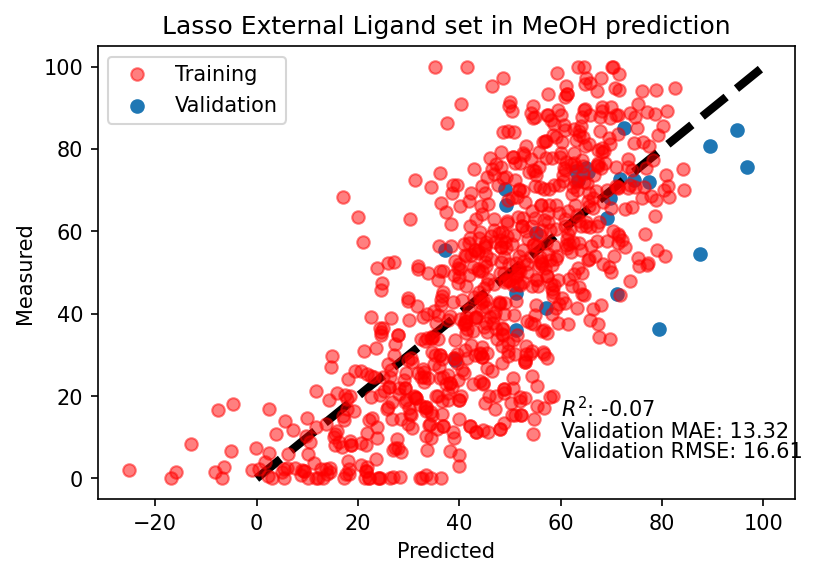

In [13]:
plt.rcParams['figure.dpi'] = 150
fig, ax = plt.subplots()
ax.scatter(Y_Pred,ext_y,label="Validation")
ax.plot( [0,100],[0,100], 'k--', lw=4)
ax.plot(lasso_search.best_estimator_.predict(X_train), Y_train, "or", alpha=0.5, label="Training")
ax.text(60,15,r'$R^2$: {:0.2f}'.format(r2_score(ext_y,Y_Pred)))
ax.text(60,10,'Validation MAE: {:0.2f}'.format(mean_absolute_error(Y_Pred,ext_y)))
ax.text(60,5,'Validation RMSE: {:0.2f}'.format(np.sqrt(mean_squared_error(Y_Pred,ext_y))))
ax.set_xlabel('Predicted')
ax.set_ylabel('Measured')
ax.set_title('Lasso External Ligand set in MeOH prediction')
plt.legend()
plt.show()

<AxesSubplot:ylabel='feature'>

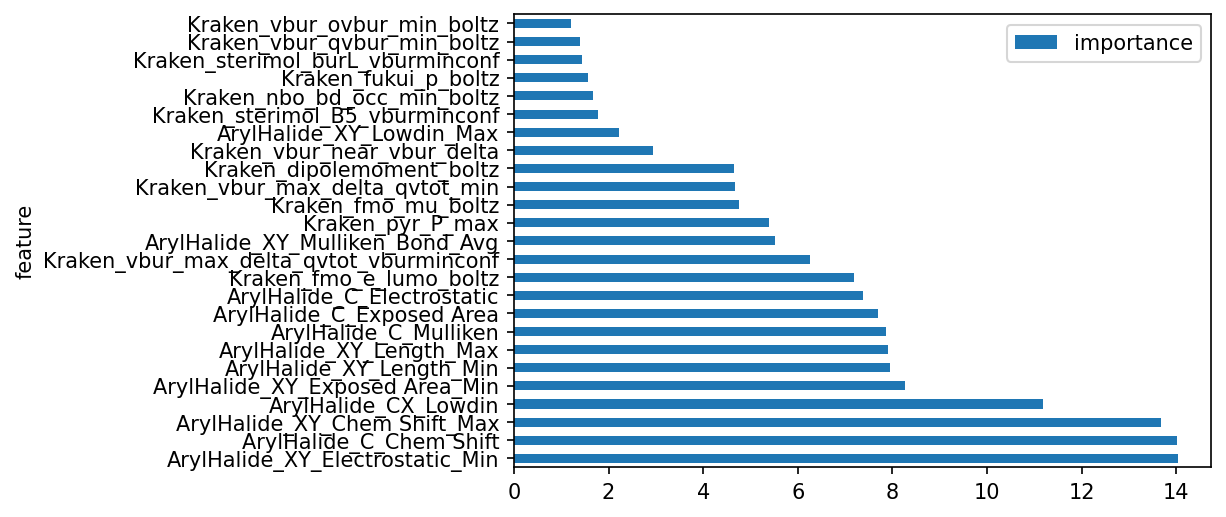

In [14]:
#Top features in Lasso
coefs=lasso_search.best_estimator_.named_steps['model'].coef_
importance=np.abs(coefs)
features=X_train.columns
df=pd.DataFrame(zip(features,importance))
df2 = df.sort_values(by=[1], ascending=False).head(25)
df2.columns = ['feature', 'importance']
df2.set_index('feature',inplace=True)
df2.plot(kind='barh')

In [15]:
%load_ext watermark

In [16]:
%watermark --iversions

sklearn   : 0.24.0
numpy     : 1.19.2
pandas    : 1.2.0
matplotlib: 3.3.3

